<a href="https://colab.research.google.com/github/joooseb/PCA/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import logging
logging.getLogger('googleapiclient.discovery_cache').setLevel(logging.ERROR)

In [ ]:
file_list = drive.ListFile({'q': "'1SNU__J3t8vBU66wR-TVJwWDSeB-QZk2K' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: PCA.ipynb, id: 1_OGmH-OhO8QBA-QORevVxqiFVwJP-GpF
title: EjercicioPCA.xlsx, id: 1DXVZHCne4Qj4pUxi9Qjc5OIq-YLK7W2y


In [ ]:
data_downloaded = drive.CreateFile({'id': '1DXVZHCne4Qj4pUxi9Qjc5OIq-YLK7W2y'})
data_downloaded.GetContentFile('EjercicioPCA.xlsx')

In [ ]:
df = pd.read_excel('EjercicioPCA.xlsx')

In [ ]:
df.head()

,Muestars,B,Pb,Cu,Zn
0,1,58,129,26,16
1,2,52,126,27,18
2,3,50,122,28,22
3,4,52,123,29,18
4,5,60,138,33,17


In [ ]:
df.drop(columns=['Muestars'], inplace=True)

In [ ]:
df.head()

,B,Pb,Cu,Zn
0,58,129,26,16
1,52,126,27,18
2,50,122,28,22
3,52,123,29,18
4,60,138,33,17


In [ ]:
n_rows = df.shape[0] # return number of rows.
n_cols = df.shape[1] # return number of cols equals to variables.

In [ ]:
print("El número de filas es:", n_rows)
print("El número de variables es:", n_cols)
print("El número de datos totales son:", n_rows * n_cols)

El número de filas es: 58
El número de variables es: 4
El número de datos totales son: 232


In [ ]:
df[["B", "Pb", "Cu", "Zn"]].describe()

,B,Pb,Cu,Zn
count,58.000000,58.000000,58.000000,58.000000
mean,52.103448,108.603448,22.362069,10.689655
std,10.438945,33.348211,7.173778,5.390723
min,37.000000,62.000000,12.000000,4.000000
25%,46.000000,85.000000,17.000000,7.000000
50%,49.000000,91.000000,19.000000,8.000000
75%,59.500000,129.750000,28.750000,16.000000
max,78.000000,178.000000,38.000000,23.000000


In [ ]:
corr_matrix = df.corr()

In [ ]:
print(corr_matrix)

           B        Pb        Cu        Zn
B   1.000000  0.886737  0.896285  0.804923
Pb  0.886737  1.000000  0.921904  0.836626
Cu  0.896285  0.921904  1.000000  0.896666
Zn  0.804923  0.836626  0.896666  1.000000


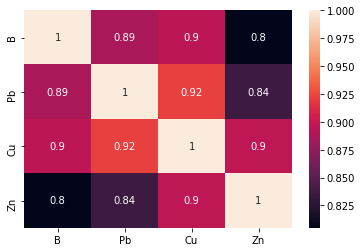

In [ ]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
"""
Normalizo los datos para poder aplicar propiedades de la distribución normal, es muy útil cuando no conozco o tengo datos con diferentes unidades de medida.
Además, es siempre recomendable para centrar los valores a la media y utilizar las propiedades de la distribución normal
"""
X_std = StandardScaler().fit_transform(df)

In [ ]:
# Cálculo de autovectores (los que no sufrían modificación de su dirección cuando la matriz sufría una alteración).
# Cálculo de autovalores (me entregan el valor de la varianza, son el factor de aumento del autovector).
print("Matriz de covarianza: \n%s" %np.cov(X_std.T))

Matriz de covarianza: 
[[1.01754386 0.90229341 0.91200899 0.81904494]
 [0.90229341 1.01754386 0.93807796 0.85130384]
 [0.91200899 0.93807796 1.01754386 0.91239719]
 [0.81904494 0.85130384 0.91239719 1.01754386]]


In [ ]:
# Obtenemos los autovalores y autovectores de la matriz

cov_matrix = np.cov(X_std.T)

eig_values, eig_vecs = np.linalg.eig(cov_matrix)

print("Autovectores \n%s" %eig_vecs)
print("Autovalores \n%s" %eig_values)

Autovectores 
[[ 0.49526228  0.55666133 -0.64572716 -0.16697269]
 [ 0.50341516  0.27047556  0.72073854 -0.3923673 ]
 [ 0.51301424 -0.05771914  0.12461424  0.84732295]
 [ 0.48795987 -0.78335154 -0.21918869 -0.31656254]]
Autovalores 
[3.68635773 0.20880766 0.11245329 0.06255676]


In [ ]:
# Emparejamos cada autovector con su autovalor
eig_pairs = [(np.abs(eig_values[i]), eig_vecs[:, i]) for i in range(len(eig_values))]

In [ ]:
# Ordenamos las parejas de forma descendiente
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [ ]:
# Visualización de la lista de los autovalores obtenidos en orden descendiente
print("Autovalores descendentes:")
for i in eig_pairs:
  print(i[0])

Autovalores descendentes:
3.6863577270679726
0.20880765725498807
0.11245329486419325
0.06255675940933636


In [ ]:
# A partir de los autovaloes se calcula la varianza explicada o que justifica cada variable
total = sum(eig_values)
var_explained = [( i / total) * 100 for i in sorted(eig_values, reverse=True)]

cum_var_explained = np.cumsum(var_explained)

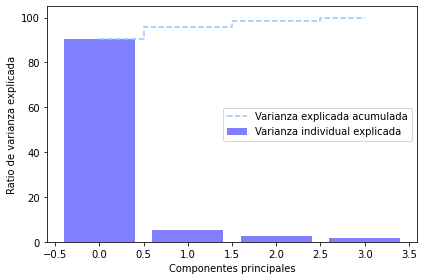

In [ ]:
# Representación gráfica en un gráfico de barras de la varianza explicada por cada autovalor y la acumulada
with plt.style.context('seaborn-pastel'):
  plt.figure(figsize=(6, 4))

  plt.bar(range(4), var_explained, alpha=0.5, align='center', label='Varianza individual explicada', color='b')

  plt.step(range(4), cum_var_explained, where='mid', linestyle='--', label='Varianza explicada acumulada')
  plt.ylabel('Ratio de varianza explicada')
  plt.xlabel('Componentes principales')
  plt.legend(loc='best')
  plt.tight_layout()

In [ ]:
print(var_explained)

[90.56999588054936, 5.13018813083376, 2.7628611238185425, 1.5369548647983506]


In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)
principal_df = pd.DataFrame(data=principal_components, columns = ['PC1', 'PC2'])

In [ ]:
principal_df

,PC1,PC2
0,1.340099,0.323880
1,1.262023,0.972456
2,1.542770,1.707216
3,1.360614,1.013233
4,2.169131,0.346061
5,1.612663,0.382593
6,1.574206,0.693549
7,2.321001,0.272844
8,1.735883,0.672353
9,1.566337,0.033859


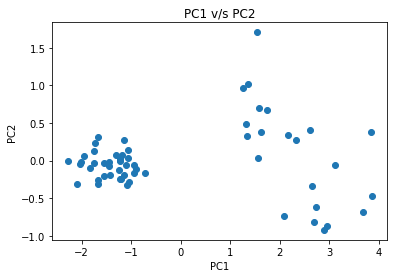

In [ ]:
plt.scatter(principal_df.PC1, principal_df.PC2)
plt.title('PC1 v/s PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.90569996, 0.05130188])

In [ ]:
print(pca.explained_variance_)

[3.68635773 0.20880766]


In [ ]:
print(pca.components_.T)

[[ 0.49526228 -0.55666133]
 [ 0.50341516 -0.27047556]
 [ 0.51301424  0.05771914]
 [ 0.48795987  0.78335154]]


In [ ]:
X_pca = pca.transform(X_std)

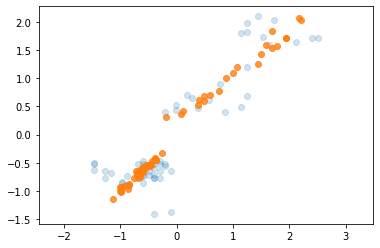

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [ ]:
from google.colab import files
principal_df.to_excel('PCA_python.xlsx')
files.download('PCA_python.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

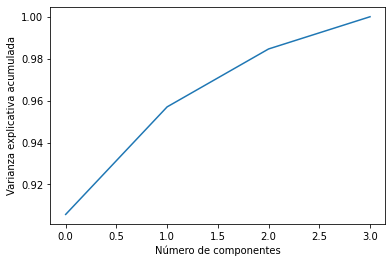

In [ ]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicativa acumulada');